## Student Loan Debt by School 2020-2021 Exploratory Data Analysis 

This project is an exploratory data analysis of student loan debt by school.  This data was obtained from the "Student Loan Debt by School 2020-2021 dataset on Kaggle. 

In [53]:
#import libraries
import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib 
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

#reading in the file
df = pd.read_csv('Student Loan Debt by School 2020-2021.csv')

In [37]:
df.head()

,index,OPE ID,School,City,State,Zip Code,School Type,Loan Type,Recipients,# of Loans Originated,$ of Loans Originated,# of Disbursements,$ of Disbursements
0,0,001051,UNIVERSITY OF ALABAMA,TUSCALOOSA,AL,35487.0,Public,Subsidized,7594.0,7622.0,33040862.0,7622.0,16774054.0
1,1,001052,UNIVERSITY OF ALABAMA AT BIRMINGHAM,BIRMINGHAM,AL,35294.0,Public,Subsidized,4272.0,4352.0,18590061.0,4352.0,9058344.0
2,2,001009,AUBURN UNIVERSITY,AUBURN,AL,36849.0,Public,Subsidized,4504.0,4504.0,19474542.0,4535.0,10142490.0
3,3,001057,UNIVERSITY OF SOUTH ALABAMA,MOBILE,AL,36688.0,Public,Subsidized,3438.0,3487.0,15061071.0,3487.0,7557853.0
4,4,001047,TROY UNIVERSITY,TROY,AL,36082.0,Public,Subsidized,4334.0,4355.0,18467508.0,4355.0,7395839.0


In [38]:
# checking for missing data 
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, pct_missing))

index - 0.0%
OPE ID - 7.01508242721852e-05%
School - 0.0003273705132701976%
City - 0.21314158774698935%
State - 0.04828715070735414%
Zip Code - 0.21314158774698935%
School Type - 0.0005612065941774816%
Loan Type - 0.00058459020226821%
Recipients - 0.00058459020226821%
# of Loans Originated - 0.00058459020226821%
$ of Loans Originated - 0.00058459020226821%
# of Disbursements - 0.00058459020226821%
$ of Disbursements - 0.00058459020226821%


We will drop missing values from the recipents column as it is important for analysis. Rows where this values i not populated will be dropped. 

In [39]:
#Dropping rows with missing Reciepients data.

df.dropna(subset = ['Recipients'], axis = 0, inplace = True)



In [40]:
#Dropping any duplicates
df.drop_duplicates()

,index,OPE ID,School,City,State,Zip Code,School Type,Loan Type,Recipients,# of Loans Originated,$ of Loans Originated,# of Disbursements,$ of Disbursements
0,0,001051,UNIVERSITY OF ALABAMA,TUSCALOOSA,AL,35487.0,Public,Subsidized,7594.0,7622.0,33040862.0,7622.0,16774054.0
1,1,001052,UNIVERSITY OF ALABAMA AT BIRMINGHAM,BIRMINGHAM,AL,35294.0,Public,Subsidized,4272.0,4352.0,18590061.0,4352.0,9058344.0
2,2,001009,AUBURN UNIVERSITY,AUBURN,AL,36849.0,Public,Subsidized,4504.0,4504.0,19474542.0,4535.0,10142490.0
3,3,001057,UNIVERSITY OF SOUTH ALABAMA,MOBILE,AL,36688.0,Public,Subsidized,3438.0,3487.0,15061071.0,3487.0,7557853.0
4,4,001047,TROY UNIVERSITY,TROY,AL,36082.0,Public,Subsidized,4334.0,4355.0,18467508.0,4355.0,7395839.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
42735,42735,042377,REGIONAL CENTER FOR BORDER HEALTH,SOMERTON,AZ,85350.0,Private-Nonprofit,Total,40.0,40.0,68672.0,80.0,68672.0
42736,42736,040293,TRENDSETTERS OF FL. SCHOOL OF BEAUTY & BARBERING,JACKSONVILLE,FL,32205.0,Proprietary,Total,40.0,40.0,51012.0,80.0,51012.0
42737,42737,004666,AMERICAN COLLEGE FOR MEDICAL CAREERS,ORLANDO,FL,32809.0,Proprietary,Total,20.0,20.0,9000.0,20.0,4504.0
42738,42738,042932,PROFESSIONAL COSMETOLOGY ACADEMY (THE),LAREDO,TX,78041.0,Proprietary,Total,8.0,8.0,23336.0,8.0,11664.0


In [41]:
# Checking data types
df.dtypes

index                      int64
OPE ID                    object
School                    object
City                      object
State                     object
Zip Code                 float64
School Type               object
Loan Type                 object
Recipients               float64
# of Loans Originated    float64
$ of Loans Originated    float64
# of Disbursements       float64
$ of Disbursements       float64
dtype: object

In [42]:
#Converting the data type of the recipients column for better formatting.

df['Recipients'] = df['Recipients'].astype('int64')

In [43]:
#Sort values by $ of disbursement to see which schools had the greatest amount of disbursements
df.sort_values(by = ['$ of Disbursements'], inplace = False, ascending = False)
df.head()

,index,OPE ID,School,City,State,Zip Code,School Type,Loan Type,Recipients,# of Loans Originated,$ of Loans Originated,# of Disbursements,$ of Disbursements
0,0,001051,UNIVERSITY OF ALABAMA,TUSCALOOSA,AL,35487.0,Public,Subsidized,7594,7622.0,33040862.0,7622.0,16774054.0
1,1,001052,UNIVERSITY OF ALABAMA AT BIRMINGHAM,BIRMINGHAM,AL,35294.0,Public,Subsidized,4272,4352.0,18590061.0,4352.0,9058344.0
2,2,001009,AUBURN UNIVERSITY,AUBURN,AL,36849.0,Public,Subsidized,4504,4504.0,19474542.0,4535.0,10142490.0
3,3,001057,UNIVERSITY OF SOUTH ALABAMA,MOBILE,AL,36688.0,Public,Subsidized,3438,3487.0,15061071.0,3487.0,7557853.0
4,4,001047,TROY UNIVERSITY,TROY,AL,36082.0,Public,Subsidized,4334,4355.0,18467508.0,4355.0,7395839.0


In [44]:
#Sort values by recipients to see which schools had the greatest amount of disbursements
df.sort_values(by = ['Recipients'], inplace = False, ascending = False)
df.head()

,index,OPE ID,School,City,State,Zip Code,School Type,Loan Type,Recipients,# of Loans Originated,$ of Loans Originated,# of Disbursements,$ of Disbursements
0,0,001051,UNIVERSITY OF ALABAMA,TUSCALOOSA,AL,35487.0,Public,Subsidized,7594,7622.0,33040862.0,7622.0,16774054.0
1,1,001052,UNIVERSITY OF ALABAMA AT BIRMINGHAM,BIRMINGHAM,AL,35294.0,Public,Subsidized,4272,4352.0,18590061.0,4352.0,9058344.0
2,2,001009,AUBURN UNIVERSITY,AUBURN,AL,36849.0,Public,Subsidized,4504,4504.0,19474542.0,4535.0,10142490.0
3,3,001057,UNIVERSITY OF SOUTH ALABAMA,MOBILE,AL,36688.0,Public,Subsidized,3438,3487.0,15061071.0,3487.0,7557853.0
4,4,001047,TROY UNIVERSITY,TROY,AL,36082.0,Public,Subsidized,4334,4355.0,18467508.0,4355.0,7395839.0


#Correlation Testing

I will also analyze the data to determine with variables are most highly correlated. My hypotheses are:
 - Number of Recipients will be correlated with \\$ of Loans Originated and \\$ of Disbursements.
 - School witll be correlated with \\$ of Loans Originated and \\$ of Disbursements.
 - Schools that are Private will have the highest \\$ of Loans Originated and\\$ of Disbursements.

In [45]:
# A quick overview of the Pearson correlation coeffecients. 

df.corr()

,index,Zip Code,Recipients,# of Loans Originated,$ of Loans Originated,# of Disbursements,$ of Disbursements
index,1.000000,0.011164,0.238585,0.237781,0.216357,0.237614,0.211421
Zip Code,0.011164,1.000000,-0.027335,-0.027019,-0.024859,-0.026403,-0.027462
Recipients,0.238585,-0.027335,1.000000,0.999338,0.911538,0.996699,0.897847
# of Loans Originated,0.237781,-0.027019,0.999338,1.000000,0.914156,0.997123,0.898758
$ of Loans Originated,0.216357,-0.024859,0.911538,0.914156,1.000000,0.908537,0.979140
# of Disbursements,0.237614,-0.026403,0.996699,0.997123,0.908537,1.000000,0.892524
$ of Disbursements,0.211421,-0.027462,0.897847,0.898758,0.979140,0.892524,1.000000


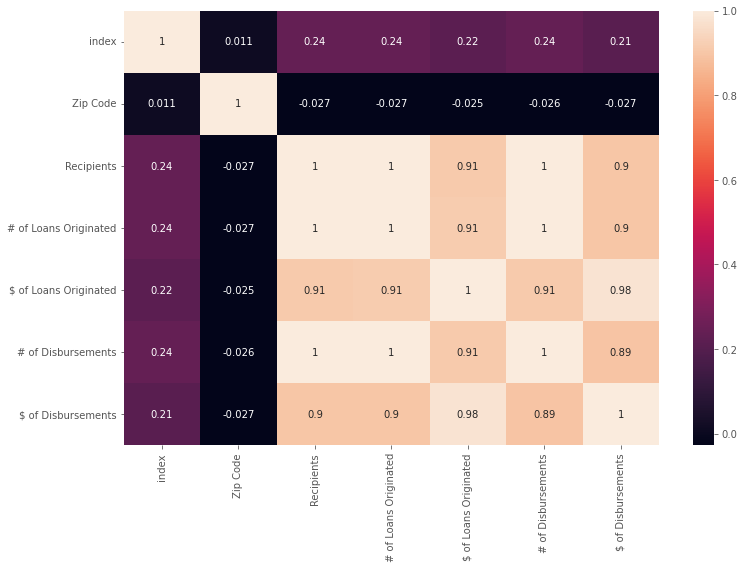

In [46]:
correlation_matrix = df.corr(method = 'pearson')

sns.heatmap(correlation_matrix, annot = True)

plt.show()

The preliminary review appears to indicate that their is a relatively high correlation between recipients and # of loans originated, $ of loans originated, # of disbursements, and $ of disbursements.

<AxesSubplot:xlabel='Recipients', ylabel='$ of Loans Originated'>

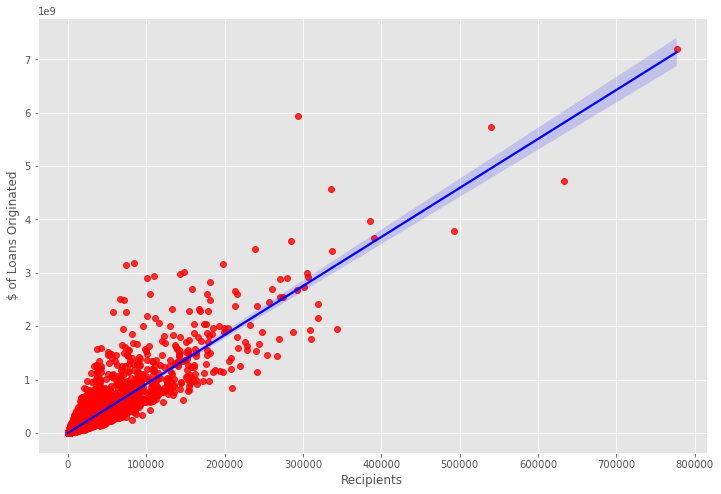

In [47]:
# Plotting Recipients vs $ of Loans Originated

sns.regplot(x = 'Recipients',y = '$ of Loans Originated',data = df, scatter_kws = {"color":"red"}, line_kws = {"color":"blue"})

<AxesSubplot:xlabel='Recipients', ylabel='$ of Disbursements'>

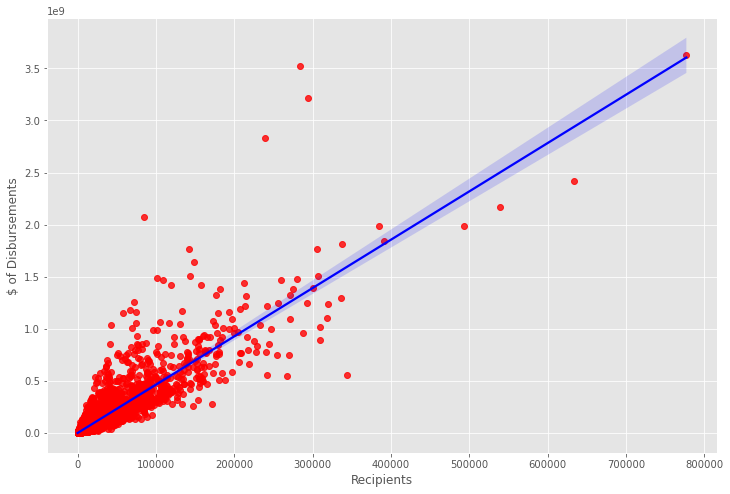

In [48]:
#Plotting Recipients vs $ of Disbursements

sns.regplot(x = 'Recipients',y = '$ of Disbursements',data = df, scatter_kws = {"color":"red"}, line_kws = {"color":"blue"}) 

In [49]:
# Is school correlated to $ of Loans Originated and $ of Disbursements

In [50]:
# As school is a non-numeric value, we will have to do some additional processing in order to compare correlation to numeric values. 

df_numerized =  df

for col_name in df_numerized.columns:
    if (df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes
    
df_numerized
    

,index,OPE ID,School,City,State,Zip Code,School Type,Loan Type,Recipients,# of Loans Originated,$ of Loans Originated,# of Disbursements,$ of Disbursements
0,0,29,3492,1466,1,35487.0,5,2,7594,7622.0,33040862.0,7622.0,16774054.0
1,1,30,3493,135,1,35294.0,5,2,4272,4352.0,18590061.0,4352.0,9058344.0
2,2,6,255,71,1,36849.0,5,2,4504,4504.0,19474542.0,4535.0,10142490.0
3,3,32,3709,910,1,36688.0,5,2,3438,3487.0,15061071.0,3487.0,7557853.0
4,4,27,3421,1458,1,36082.0,5,2,4334,4355.0,18467508.0,4355.0,7395839.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
42735,42735,4068,2810,1339,3,85350.0,3,3,40,40.0,68672.0,80.0,68672.0
42736,42736,3586,3395,677,9,32205.0,4,3,40,40.0,51012.0,80.0,51012.0
42737,42737,1784,121,1063,9,32809.0,4,3,20,20.0,9000.0,20.0,4504.0
42738,42738,4272,2758,757,45,78041.0,4,3,8,8.0,23336.0,8.0,11664.0


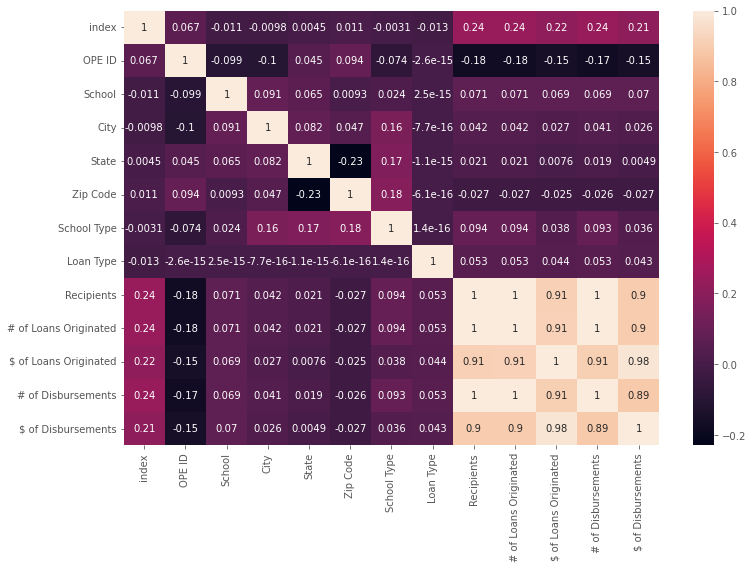

In [55]:
correlation_matrix = df_numerized.corr(method = 'pearson')

sns.heatmap(correlation_matrix, annot = True)

plt.show()

In [56]:
df_numerized.corr()

,index,OPE ID,School,City,State,Zip Code,School Type,Loan Type,Recipients,# of Loans Originated,$ of Loans Originated,# of Disbursements,$ of Disbursements
index,1.000000,6.743917e-02,-1.126934e-02,-9.844739e-03,4.536672e-03,1.116406e-02,-3.050144e-03,-1.287423e-02,0.238585,0.237781,0.216357,0.237614,0.211421
OPE ID,0.067439,1.000000e+00,-9.865739e-02,-1.010530e-01,4.536673e-02,9.421859e-02,-7.359257e-02,-2.619397e-15,-0.175887,-0.175289,-0.154508,-0.172823,-0.153683
School,-0.011269,-9.865739e-02,1.000000e+00,9.132064e-02,6.455940e-02,9.321825e-03,2.363968e-02,2.459488e-15,0.070666,0.070721,0.068916,0.068847,0.069694
City,-0.009845,-1.010530e-01,9.132064e-02,1.000000e+00,8.163426e-02,4.730706e-02,1.558353e-01,-7.721133e-16,0.042290,0.041865,0.026839,0.040850,0.026216
State,0.004537,4.536673e-02,6.455940e-02,8.163426e-02,1.000000e+00,-2.296254e-01,1.653008e-01,-1.092669e-15,0.020825,0.020654,0.007561,0.019297,0.004927
Zip Code,0.011164,9.421859e-02,9.321825e-03,4.730706e-02,-2.296254e-01,1.000000e+00,1.839768e-01,-6.139893e-16,-0.027335,-0.027019,-0.024859,-0.026403,-0.027462
School Type,-0.003050,-7.359257e-02,2.363968e-02,1.558353e-01,1.653008e-01,1.839768e-01,1.000000e+00,1.355684e-16,0.094035,0.094363,0.037836,0.093152,0.036348
Loan Type,-0.012874,-2.619397e-15,2.459488e-15,-7.721133e-16,-1.092669e-15,-6.139893e-16,1.355684e-16,1.000000e+00,0.053426,0.053299,0.044482,0.053276,0.043351
Recipients,0.238585,-1.758869e-01,7.066621e-02,4.229024e-02,2.082490e-02,-2.733544e-02,9.403539e-02,5.342572e-02,1.000000,0.999338,0.911538,0.996699,0.897847
# of Loans Originated,0.237781,-1.752895e-01,7.072078e-02,4.186493e-02,2.065410e-02,-2.701926e-02,9.436277e-02,5.329896e-02,0.999338,1.000000,0.914156,0.997123,0.898758


In [60]:
correlation_mat = df_numerized.corr()

corr_pairs = correlation_mat.unstack()

sorted_pairs = corr_pairs.sort_values()

sorted_pairs

Zip Code               State                -0.229625
State                  Zip Code             -0.229625
OPE ID                 Recipients           -0.175887
Recipients             OPE ID               -0.175887
# of Loans Originated  OPE ID               -0.175289
                                               ...   
City                   City                  1.000000
School                 School                1.000000
OPE ID                 OPE ID                1.000000
# of Disbursements     # of Disbursements    1.000000
$ of Disbursements     $ of Disbursements    1.000000
Length: 169, dtype: float64

In [61]:
high_corr = sorted_pairs[(sorted_pairs)>0.5]

high_corr

$ of Disbursements     # of Disbursements       0.892524
# of Disbursements     $ of Disbursements       0.892524
Recipients             $ of Disbursements       0.897847
$ of Disbursements     Recipients               0.897847
                       # of Loans Originated    0.898758
# of Loans Originated  $ of Disbursements       0.898758
# of Disbursements     $ of Loans Originated    0.908537
$ of Loans Originated  # of Disbursements       0.908537
Recipients             $ of Loans Originated    0.911538
$ of Loans Originated  Recipients               0.911538
# of Loans Originated  $ of Loans Originated    0.914156
$ of Loans Originated  # of Loans Originated    0.914156
                       $ of Disbursements       0.979140
$ of Disbursements     $ of Loans Originated    0.979140
# of Disbursements     Recipients               0.996699
Recipients             # of Disbursements       0.996699
# of Disbursements     # of Loans Originated    0.997123
# of Loans Originated  # of Dis

To revisit my hypotheses, 
 - Number of Recipients is highly correlated with \\$ of Loans Originated and \\$ of Disbursements.
 - School does not appear to be affliated with \\$ of Loans Originated and \\$ of Disbursements.
 - School type also does not appear to be highly correlated with \\$ of Loans Originated and \\$ of Disbursements. 